# Review Analysis

## Steps:
* Data preprocessing
* Sentiment analysis
* Keyword extraction
* Topic analysis
* Satisfaction analysis
* word cloud visualization
* contrastive analysis


## 1. Data proprocessing
从csv文件中读取数据。
数据清洗

In [1]:
# 下载需要的modules
import pandas as pd 
import re
%pip install nltk


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
print(nltk.data.path)
print(nltk.__version__)
nltk.download('wordnet')

Note: you may need to restart the kernel to use updated packages.
['C:\\Users\\40118/nltk_data', 'e:\\Python\\nltk_data', 'e:\\Python\\share\\nltk_data', 'e:\\Python\\lib\\nltk_data', 'C:\\Users\\40118\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
3.9.1


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\40118\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
print(nltk.data.path)

['C:\\Users\\40118/nltk_data', 'e:\\Python\\nltk_data', 'e:\\Python\\share\\nltk_data', 'e:\\Python\\lib\\nltk_data', 'C:\\Users\\40118\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
# 添加到 nltk.data.path 中
nltk.data.path.append(r'C:\Users\40118\AppData\Roaming\nltk_data')

try:
    nltk.data.find('tokenizers/punkt')
    print("punkt is installed successfully!")
except LookupError:
    print("punkt is not installed!")


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet

# 运行词汇分词测试
sentence = "This is a test sentence."
tokens = word_tokenize(sentence)
print("Tokenized Sentence:", tokens)

# 测试 stopwords
stop_words = stopwords.words('english')
print("Stopwords:", stop_words[:10])  # 打印前10个停用词

# 测试 wordnet
synsets = wordnet.synsets("dog")
print("Synsets for 'dog':", synsets)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\40118\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\40118\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


punkt is installed successfully!
Tokenized Sentence: ['This', 'is', 'a', 'test', 'sentence', '.']
Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
Synsets for 'dog': [Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]


In [4]:
# Data preprocessing

# Load .csv file
data = pd.read_csv(r'C:\Users\40118\OneDrive\Courses\unfiled project\virtural internship projects\British Airway\data\BA_reviews.csv')
print(data.head())

# Data cleaning
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Transfer it into lowercase
    tokens = word_tokenize(text)  #分词
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # 去掉停用词
    return ' '.join(tokens)

data['cleaned_review'] = data['reviews'].apply(preprocess_text)
print(data['cleaned_review'].head())

                                             reviews
0  ✅ Trip Verified |   British airways lost bags ...
1  ✅ Trip Verified | The check in process and rew...
2  ✅ Trip Verified |   We flew in November 2023, ...
3  ✅ Trip Verified | I left for London from Johan...
4  ✅ Trip Verified |   After an excellent flight ...
0    trip verified british airways lost bags lhr fo...
1    trip verified check process rewardloyalty prog...
2    trip verified flew november took long seek sat...
3    trip verified left london johannesburg decembe...
4    trip verified excellent flight cpt lhr return ...
Name: cleaned_review, dtype: object


## 2. 情感分析
目标：
分析评论的正面、负面或中性情感。
方法：
使用预训练的情感分析模型或工具包（如 TextBlob 或 VADER）。

In [5]:
print(data.columns)

Index(['reviews', 'cleaned_review'], dtype='object')


In [6]:
%pip install textblob
from textblob import TextBlob

# 计算情感得分
data['sentiment'] = data['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(data[['reviews', 'sentiment']].head())

# 简单分类为正面、负面和中性
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
print(data['sentiment_category'].value_counts())


Note: you may need to restart the kernel to use updated packages.
                                             reviews  sentiment
0  ✅ Trip Verified |   British airways lost bags ...  -0.066667
1  ✅ Trip Verified | The check in process and rew...  -0.308333
2  ✅ Trip Verified |   We flew in November 2023, ...  -0.056439
3  ✅ Trip Verified | I left for London from Johan...   0.044049
4  ✅ Trip Verified |   After an excellent flight ...   0.218618
sentiment_category
positive    627
negative    354
neutral      19
Name: count, dtype: int64


## 3. 关键词提取
目标：
提取高频关键词，分析旅客关心的重点。

In [7]:
%pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer

# 提取高频词
vectorizer = CountVectorizer(max_features=10)  # 取前10个高频词
X = vectorizer.fit_transform(data['cleaned_review'])
keywords = vectorizer.get_feature_names_out()
print("关键词:", keywords)


Note: you may need to restart the kernel to use updated packages.
关键词: ['ba' 'british' 'crew' 'flight' 'london' 'service' 'time' 'trip' 'us'
 'verified']


## 4. 主题分析
目标：
使用 LDA 或其他主题模型发现隐藏的评价主题。

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA 主题模型
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # 假设有2个主题
lda.fit(X)

# 输出主题关键词
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"主题 {idx}: {[terms[i] for i in topic.argsort()[-5:]]}")


主题 0: ['us', 'london', 'verified', 'flight', 'ba']
主题 1: ['british', 'service', 'trip', 'verified', 'flight']


## 5. 满意度分析
目标：
将情感分析的结果转化为评分，统计总体满意度。



In [9]:
# 满意度评分转换（将情感得分转化为1-5分制）
data['satisfaction_score'] = data['sentiment'].apply(lambda x: round((x + 1) * 2.5, 2))  # -1~1映射到1~5
print(data[['reviews', 'satisfaction_score']].head())


                                             reviews  satisfaction_score
0  ✅ Trip Verified |   British airways lost bags ...                2.33
1  ✅ Trip Verified | The check in process and rew...                1.73
2  ✅ Trip Verified |   We flew in November 2023, ...                2.36
3  ✅ Trip Verified | I left for London from Johan...                2.61
4  ✅ Trip Verified |   After an excellent flight ...                3.05


## 6. 词云可视化
目标：
直观展示评价中的高频词。

In [10]:
%pip install --upgrade kiwisolver

Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


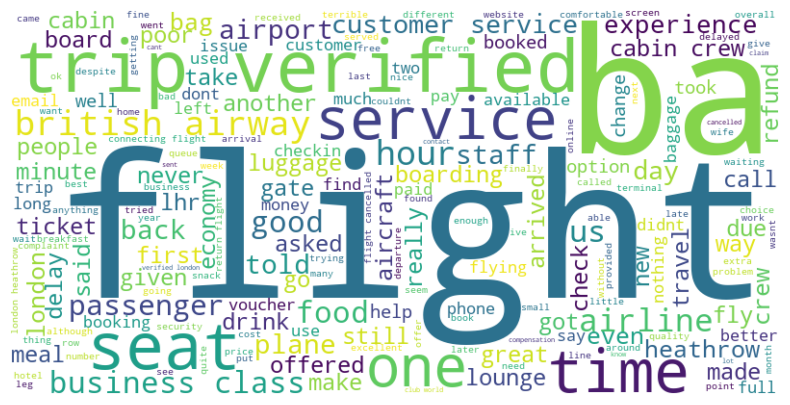

In [12]:
#%pip uninstall matplotlib
#%pip install matplotlib

#%pip install wordcloud

#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

# 生成词云
all_text = " ".join(data['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 7. 对比分析
目标：
对不同航空公司、不同时间段的评价进行对比。
示例：对两家航空公司的评价进行比较

sentiment_category
negative    2.141610
neutral     2.500000
positive    2.950271
Name: satisfaction_score, dtype: float64


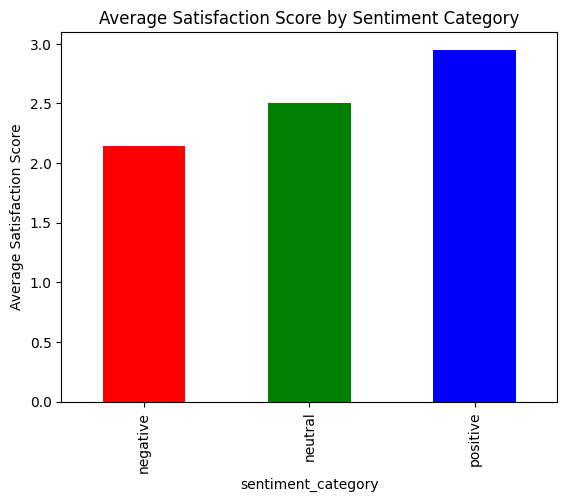

In [13]:
# 示例：比较不同情感分类的平均满意度
comparison = data.groupby('sentiment_category')['satisfaction_score'].mean()
print(comparison)

# 可视化对比
comparison.plot(kind='bar', color=['red', 'green', 'blue'], title='Average Satisfaction Score by Sentiment Category')
plt.ylabel('Average Satisfaction Score')
plt.show()
